In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
# Ejercicio 1
folder = 'data/tiempos.csv'
df = pd.read_csv(folder, sep=';')
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,02:52:01,04:14:12,05:56:53,06:25:24,08:34:23,10:36:25,11:43:18
1,02:43:32,04:13:40,06:11:44,06:48:12,09:16:50,11:14:02,12:18:22
2,03:08:03,04:39:34,06:29:37,06:59:38,09:40:45,12:08:35,13:23:45
3,03:15:20,04:48:13,06:37:29,07:05:43,09:39:46,12:09:50,13:20:18
4,03:15:53,04:56:32,06:55:22,07:33:08,10:19:46,12:46:40,14:23:46


In [26]:
# cuidado la columna de tiempo es un string y esta en formato hh:mm:ss hay que pasarlas a formato segundos

for col in df.columns:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds() # convierte a segundos
print(df.head())

        P1       P2       P3       P4       P5       P6  T_Final
0  10321.0  15252.0  21413.0  23124.0  30863.0  38185.0  42198.0
1   9812.0  15220.0  22304.0  24492.0  33410.0  40442.0  44302.0
2  11283.0  16774.0  23377.0  25178.0  34845.0  43715.0  48225.0
3  11720.0  17293.0  23849.0  25543.0  34786.0  43790.0  48018.0
4  11753.0  17792.0  24922.0  27188.0  37186.0  46000.0  51826.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   P1       268 non-null    float64
 1   P2       268 non-null    float64
 2   P3       268 non-null    float64
 3   P4       268 non-null    float64
 4   P5       268 non-null    float64
 5   P6       268 non-null    float64
 6   T_Final  268 non-null    float64
dtypes: float64(7)
memory usage: 14.8 KB


In [28]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

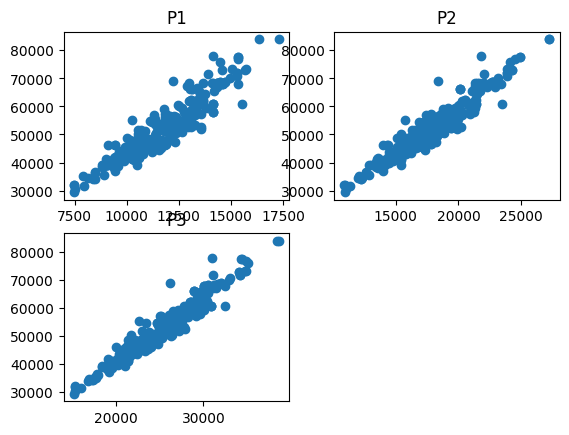

In [29]:
# Ejercicio 2
plt.subplot(2,2,1)
plt.scatter(X[:,0], y)
plt.title('P1')
plt.subplot(2,2,2)
plt.scatter(X[:,1], y)
plt.title('P2')
plt.subplot(2,2,3)
plt.scatter(X[:,2], y)
plt.title('P3')
plt.show()


In [30]:
# Ejercicio 3

# dividir en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ejercicio 4

# sacar un conjunto normalizado
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train) # ajusta y transforma
X_test_norm = scaler.transform(X_test) # solo transforma

# ajusta con el conjunto de entrenamiento

## Regresion lineal
reg_origin = LinearRegression()
reg_origin.fit(X_train, y_train)

reg_norm = LinearRegression()
reg_norm.fit(X_train_norm, y_train)

def eval_model(model, X, y):
    y_pred = model.predict(X)
    # error cuadratico medio (con numpy) OJO: no es el de sklearn, lo puse para que vieran otra forma de hacerlo
    # RSME => raiz del error cuadratico medio (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    return rmse

rmse_origin = eval_model(reg_origin, X_test, y_test)

print(f'RMSE original: {rmse_origin}')

rmse_norm = eval_model(reg_norm, X_test_norm, y_test)

print(f'RMSE normalizado: {rmse_norm}')


RMSE original: 749.1739536991648
RMSE normalizado: 749.1739536991635


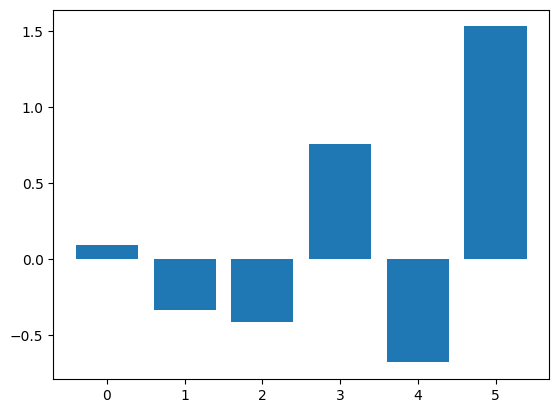

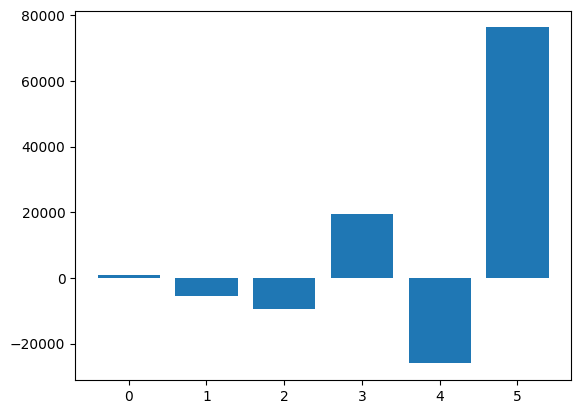

In [31]:
# Ejercicio 5

plt.bar(range(len(reg_origin.coef_)), reg_origin.coef_)
plt.show()

plt.bar(range(len(reg_norm.coef_)), reg_norm.coef_)
plt.show()